# Convolutional Neural Network (CNN)

This assignment is an _edited_ version of Tensorflow's official [CNN tutorial](https://www.tensorflow.org/tutorials/images/cnn). The goal of this assignment is to go through the notebook and fill in the empty code cells when prompted. Moreover, you will be asked to write down short comments on any notable observations in the _Comments_ section under each question.

As a precursor to starting this assignment, you can optionally go through the original notebook and read through any extra comments that might have been removed in this version.

This notebook can be run locally, or can be run from <b>Google Colab</b> which can be found [here](https://colab.research.google.com/drive/1PztXT1Xe7AMkNpy-O4tUAkn2wDfeI41H?usp=sharing).

### Import TensorFlow

In [ ]:
from time import time
import tensorflow as tf

import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings("ignore")

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


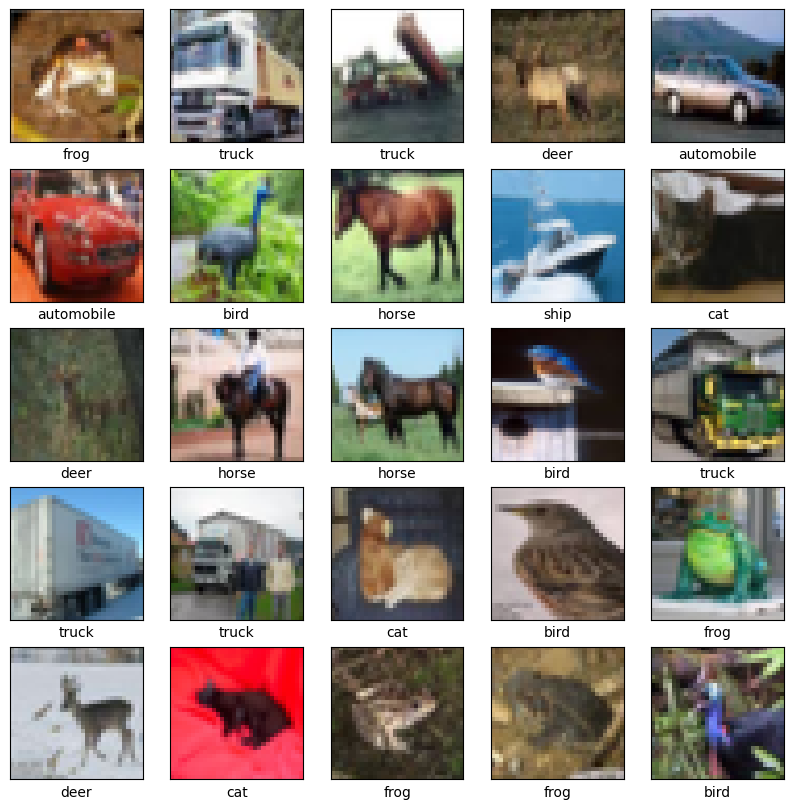

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Creating the model's architecture

In [ ]:
def fit(model,epochs:int=10,optimizer='adam',
        verbose:int=1, batch_size:int=32):

    #Load Model
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    #Print Model Summary
    print(model.summary())

    s=time()

    #Train Model
    history = model.fit(train_images, train_labels, epochs=epochs, verbose=verbose,
                        validation_data=(test_images, test_labels), batch_size=batch_size)

    print(f'Finished in {round(time()-s,2)}s')

    #Plot Training process
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label = 'Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    #Test model on unseen data
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print(f'Test Accuracy: {round(test_acc,2)}%')

In the original notebook, the below model configuration was used. 3 Convolution Layers were used to extract visual features from the image. Then these features are passed to a normal Neural Network which will learn to classify the different class labels.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 58.07s
313/313 - 0s - 2ms/step - accuracy: 0.6941 - loss: 0.9291
Test Accuracy: 0.69%


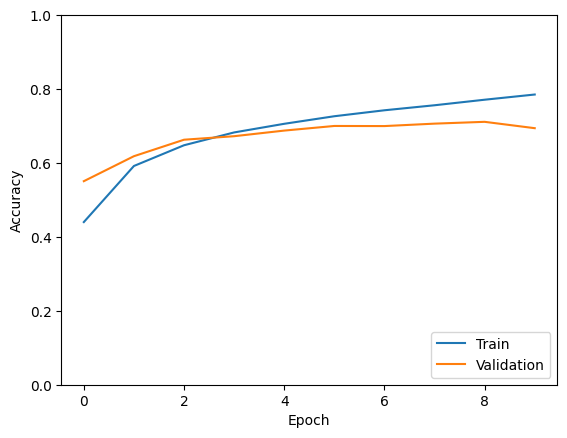

In [ ]:
model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add Dense/Fully-Connected Layers.
#These contain the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

fit(model,verbose=0)

del model

### Q.1
Create a model architecture that has only one (Conv2D+MaxPooling2D) layer. Then. pass this model to the predefined <code>fit</code> function, which will train the model, display the training progress, and evaluate on the test set.  

Write down what differences you note between this model and the original one in the _Comments_ section.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         460,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 49.63s
313/313 - 0s - 1ms/step - accuracy: 0.6382 - loss: 1.0876
Test Accuracy: 0.64%


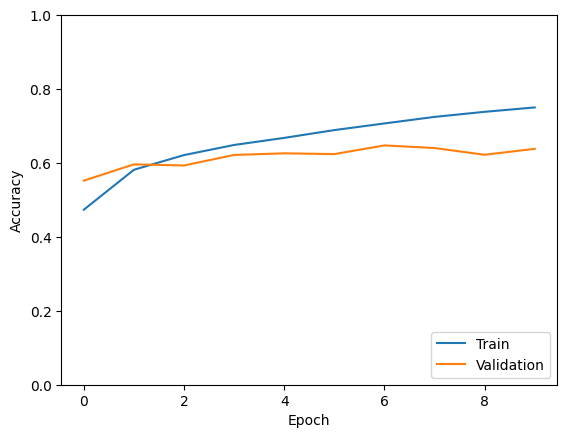

In [ ]:
#Define Model and pass to 'fit' function
model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add Dense/Fully-Connected Layers.
#These contain the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

fit(model,verbose=0)

del model


##### Comments

The original model had a higher accuracy than the model with 1 layer. However, the latter model had a significantly higher loss than the original model.

In addition, the new model, despite having less layers, contained much more total parameters (462,410) than the original model (122,570).

### Q.2
The original CNN architecture used 32,64,64 output channels for each of the Convolution Layers respectively. Does increasing the output channels (eg. 128,256,256) boost performance on our small dataset? What happens when you decrease the output channels (eg. 8,16,16)?

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,151,690 (4.39 MB)

 Trainable params: 1,151,690 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 104.66s
313/313 - 1s - 2ms/step - accuracy: 0.7249 - loss: 1.0319
Test Accuracy: 0.72%


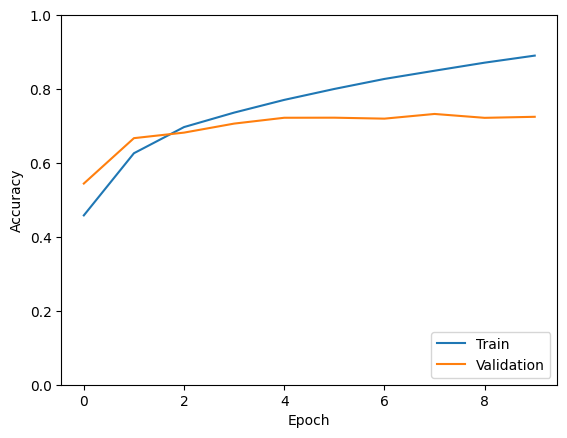

In [ ]:
#Define Model with higher CNN output channels

model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

#Add Dense/Fully-Connected Layers.
#These contain the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

fit(model,verbose=0)

del model

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,810 (81.29 KB)

 Trainable params: 20,810 (81.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 54.06s
313/313 - 0s - 1ms/step - accuracy: 0.6159 - loss: 1.0878
Test Accuracy: 0.62%


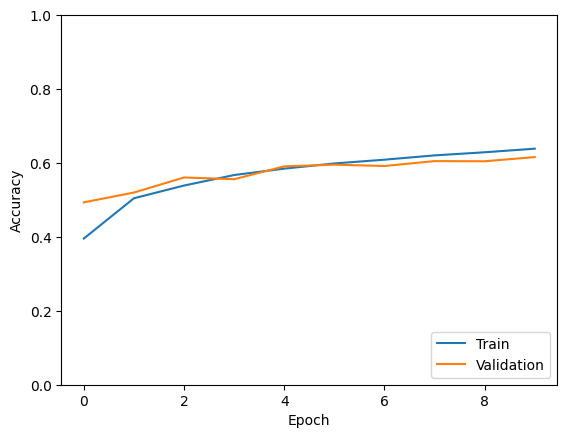

In [ ]:
#Define Model with lower CNN output channels

model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

#Add Dense/Fully-Connected Layers.
#These contian the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

fit(model,verbose=0)

del model

##### Comments

Increasing the number of output channels of the model (e.g. 128, 256, 256) leads to a signifcantly higher accuracy than having a model with less output channels (e.g. 8, 16, 16). Additionally, having less output channels generally leads to more loss compared to having more output channels. It is also worth noting that the total parameters of a model with more output channels is much higher compared to a model with less output channels.

When compared to the original model (i.e. 32, 64, 64), the one with more output channels has a slightly higher accuracy, while also suffering from a significant increase in loss. Thus, there are no notable benefits to having a model with more output channels, as you can still have an increase in accuracy, but if the loss increases then that indiciates that the model can have similar, if not worse, performance.

Importance must also be given to the increase in the number of total parameters, as having too many parameters can lead to more complexity in the model, which can lead to overfitting and a decrease in model efficiency if not treated correctly.

### Q.3
The Convolution Layers apply the _convolution_ operation on the image. Max-Pooling slides (in this case) a <code>2x2</code> window across the resulting convolution and takes only the maximum value. Max-Pooling adds translation invariance to the model - meaning translating the image by a small amount does not significnatly hinder performance.

Max-Pooling also helps reduce the size of the visual features, but having too large of a window might ignore more finer details of the object in the image. Show this empirically, by increasing the size of the <code>MaxPooling2D</code> sliding window and noting any changes in performance and time-efficiency. By looking at the original model's summary, we can see that the final <code>Conv2D</code> layer was outputting features in <code>4x4</code> matrices. Try and make the third <code>Conv2D</code> layer output <code>1x1</code> matrices of features instead, by editing some parameters of the <code>MaxPooling2D</code> layers.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 1, 1, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,130 (238.79 KB)

 Trainable params: 61,130 (238.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 54.14s
313/313 - 1s - 2ms/step - accuracy: 0.7051 - loss: 0.8574
Test Accuracy: 0.71%


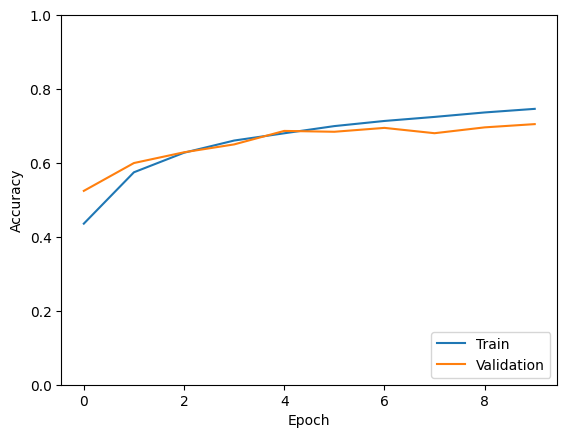

In [ ]:
#Define Model with bigger MaxPooling Window.

model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add Dense/Fully-Connected Layers.
#These contain the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

fit(model,verbose=0)

del model


##### Comments

->

### Q.4
Activation Functions are applied to the output of a neuron in a Neural Network. ReLU (Rectified Linear Unit) is one of the most popular activation functions used in Machine Learning. Experiment with another activation function of your choice and note any differences.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 51.96s
313/313 - 0s - 2ms/step - accuracy: 0.6976 - loss: 1.1008
Test Accuracy: 0.7%


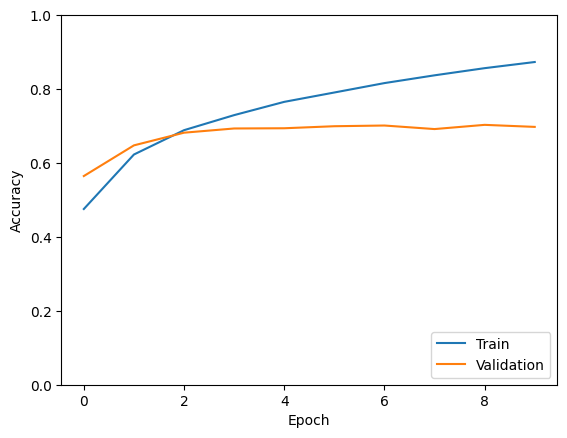

In [ ]:
#Define Model with different activation function other than ReLU

model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='gelu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='gelu'))

#Add Dense/Fully-Connected Layers.
#These contain the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='gelu'))
model.add(layers.Dense(10))

fit(model,verbose=0)

del model


##### Comments

TanH: Less Accuracy than ReLU at 66%<br>
      &emsp;&emsp;&ensp;&nbsp;Higher Loss than ReLU at 1.0044<br><br>
Sigmoid: Less Accuracy than ReLU at 57%<br>
      &emsp;&emsp;&ensp;&nbsp;Higher Loss than ReLU at 1.2079<br><br>
ReLU v6: Slight Less Accuracy than ReLU at 71%<br>
      &emsp;&emsp;&ensp;&nbsp;Slightly Higher Loss than ReLU at 0.8761<br><br>
Leaky ReLU: Slightly Higher Accuracy than ReLU at 73%<br>
      &emsp;&emsp;&ensp;&nbsp;Slightly Higher Loss than ReLU at 0.8964<br><br>
GeLU: Slightly Less Accuracy than ReLU at 70%<br>
      &emsp;&emsp;&ensp;&nbsp;Higher Loss than ReLU at 1.0731<br><br>

### Q.5
We have explored with improving the feautre detection process. Now let's turn our attention to the _classifier_ part; the final fully-connected layer. After flattening the features into a 1-D vector, can you modify the final dense layer (change number of neurons, add more layers, etc.) and describe how this affects the performance of the model?

Note: The final output of the dense layer must still be 10, as this is the number of classes in our _CIFAR10_ dataset.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321,290 (1.23 MB)

 Trainable params: 321,290 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 52.85s
313/313 - 0s - 1ms/step - accuracy: 0.7140 - loss: 0.9264
Test Accuracy: 0.71%


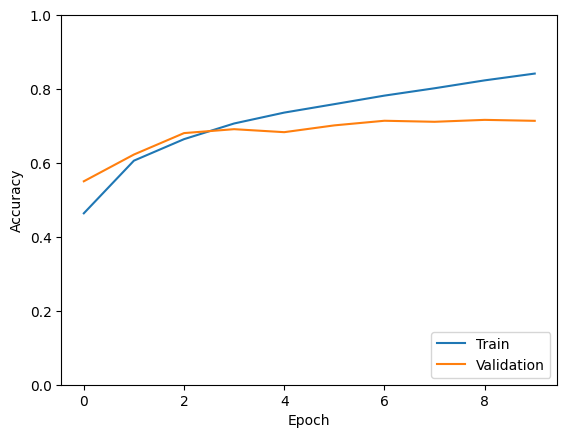

In [ ]:
#Define Model with modified dense layers

model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add Dense/Fully-Connected Layers.
#These contain the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

fit(model,verbose=0)

del model


##### Comments

Increasing number of neurons to 128: Slight decrease in accuracy from 0.72% to 0.71%, slight increase in loss from 0.8657 to 0.9048 (slight decrease in performance)<br><br>
Decreasing number of neurons to 32: Slight increase in accuracy from 0.72% to 0.73%, slight decrease in loss from 0.8657 to 0.8349 (slight increase in performance)<br><br>
Decreasing number of neurons to 16: Significant decrease in accuracy from 0.72% to 0.66%, significant increase in loss from 0.8657 to 0.9762 (significant decrease in performance)<br><br>
Increasing number of neurons to 256: Slight decrease in accuracy from 0.72% to 0.71%, significant increase in loss from 0.8657 to 0.9348 (decrease in performance)

### Q.6
In a Neural Network, the optimizer is the heuristic function used to 'push' the model down the right path. Compare two versions of an architecture of your choice that use different optimizers. This can be done by setting the <code>optimizer</code> parameter in the <code>fit</code> function (eg. <code>optimizer='sgd'</code>).

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 49.15s
313/313 - 0s - 2ms/step - accuracy: 0.5873 - loss: 1.1548
Test Accuracy: 0.59%


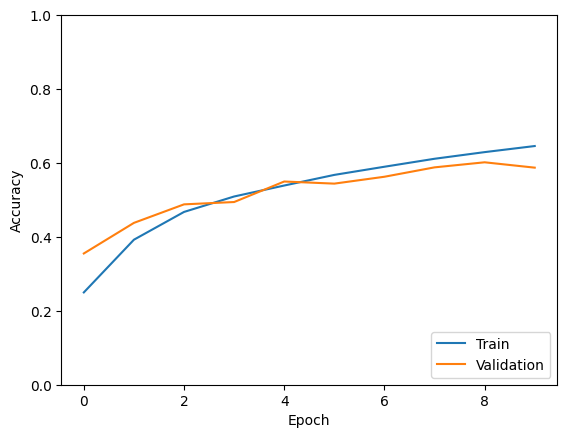

In [ ]:
#Define Model with Optimizer 1

model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add Dense/Fully-Connected Layers.
#These contain the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

fit(model,verbose=0, optimizer='sgd')

del model

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 48.6s
313/313 - 0s - 2ms/step - accuracy: 0.4234 - loss: 1.6180
Test Accuracy: 0.42%


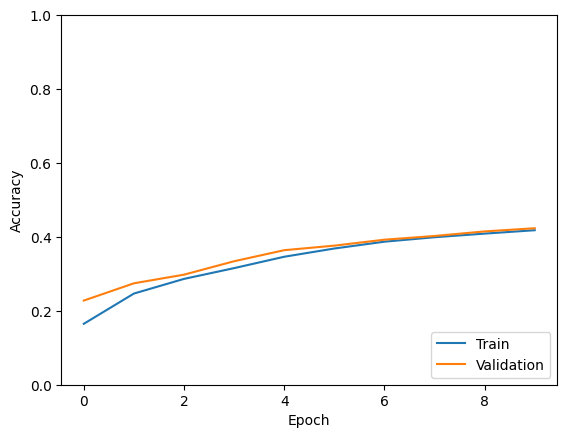

In [ ]:
#Define Model with Optimizer 2

model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add Dense/Fully-Connected Layers.
#These contain the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

fit(model,verbose=0, optimizer='adagrad')

del model

##### Comments

Differences: Using the SGD Optimizer provides much better performance than with the Adagrad Optimizer. In fact, the SGD Optimizer provides a much higher accuracy at 0.63%, compared to 0.42% with the Adagrad Optimizer. The former optimizer also provices a much lower loss at 1.0572, compared to a loss of 1.6264 with the Adagrad Optimizer.

### Q.7
The original CNN architecture managed to achieve ~70% accuracy on the test set using 122,570 model parameters. Can you define your own CNN architecture and try to improve on the original model? Improvements include: achieving higher performance on the test set, comparable performance using significantly fewer model parameters, faster training time, different model architecture, etc...

Note down which factors of your CNN architecture you found to be the most responsible for contributing to model performance.

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)                   │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146,122 (570.79 KB)

 Trainable params: 146,122 (570.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Finished in 53.92s
313/313 - 0s - 1ms/step - accuracy: 0.7158 - loss: 0.8170
Test Accuracy: 0.72%


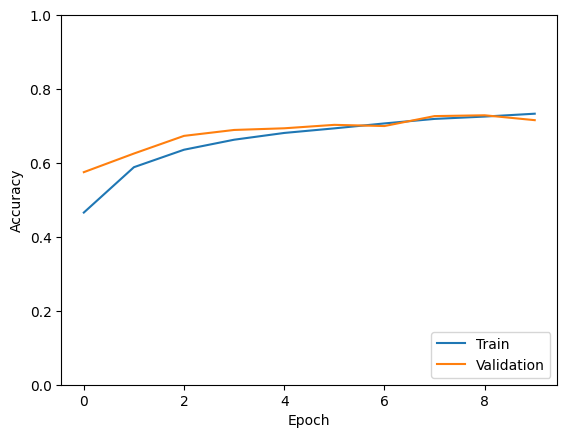

In [ ]:
#Define Custom CNN Model

model = models.Sequential()

#Perform 2D Convolution + MaxPooling on the image, reducing its size.
#These extract the most important visual features from the image.
model.add(layers.Conv2D(16, (3, 3), activation='leaky_relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='leaky_relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='leaky_relu', padding='same'))
model.add(layers.Dropout(0.5))

#Add Dense/Fully-Connected Layers.
#These contain the 'classification' part of the model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='leaky_relu'))
model.add(layers.Dense(10))

fit(model,verbose=0)

del model

##### Comments

By changing a few parts of the model architecture, the new model can be made to achieve a higher performance (i.e. higher accuracy and lower loss) than the original model.<br>
The main contributing factors to an increased model performance are the type of activation function that is used, slightly decreasing the number of output channels in the convolutional layers and altering the padding type.<br>
The modifications that were made to improve on the original model were:
<ol>
  <li>Decreasing the number of output channels from (32, 64, 64) to (16, 32, 32).</li>
  <li>Changing the activation function from 'relu' to 'leaky_relu'.</li>
  <li>Using the 'same' padding value in the convolutional layers.</li>
  <li>Adding a Dropout layer after the third convolutional layer.</li>
</ol>

All these modifications were done at the expense of increasing the number of total parameters.